# Avito Demand Prediction

## Results presentation

Date: 18/10/2018

## Exploration

### Loading

In [1]:
ls

'Avito Demand Prediction.ipynb'   sample_submission.csv   train.csv.zip
 periods_test.csv.zip             test.csv.zip            train_active.csv.zip
 periods_train.csv.zip            test_active.csv.zip


In [2]:
import numpy as np
import pandas as pd
import zipfile

In [3]:
zf_train = zipfile.ZipFile('train.csv.zip')
zf_test = zipfile.ZipFile('test.csv.zip')

train = pd.read_csv(zf_train.open('train.csv'), index_col=0)
test = pd.read_csv(zf_test.open('test.csv'), index_col=0)

### Exploration

In [4]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1503424 entries, b912c3c6a6ad to 9ad3b7bff1db
Data columns (total 17 columns):
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: float64(3), int64(1), object(13)
memory usage: 206.5

user_id                 region              city  \
item_id                                                               
b912c3c6a6ad  e00f8ff2eaf9   Свердловская область      Екатеринбург   
2dac0150717d  39aeb48f0017      Самарская область            Самара   
ba83aefab5dc  91e2f88dd6e3     Ростовская область    Ростов-на-Дону   
02996f1dd2ea  bf5cccea572d              Татарстан  Набережные Челны   
7c90be56d2ab  ef50846afc0b  Волгоградская область         Волгоград   

             parent_category_name               category_name  \
item_id                                                         
b912c3c6a6ad          Личные вещи  Товары для детей и игрушки   
2dac0150717d      Для дома и дачи           Мебель и интерьер   
ba83aefab5dc  Бытовая электроника               Аудио и видео   
02996f1dd2ea          Личные вещи  Товары для детей и игрушки   
7c90be56d2ab            Транспорт                  Автомобили   

                                  param_1     param_2 param_3  \
item_id                                                         
b912c3c6a6ad    Постельные принадлежности         NaN     NaN   
2dac0150717d                       Другое         NaN     NaN   
ba83aefab5dc  Видео, DVD и Blu-ray плееры         NaN     NaN   
02996f1dd2ea         Автомобильные кресла         NaN     NaN   
7c90be56d2ab                   С пробегом  ВАЗ (LADA)    2110   

                              title  \
item_id                               
b912c3c6a6ad  Кокоби(кокон для сна)   
2dac0150717d      Стойка для Одежды   
ba83aefab5dc         Philips bluray   
02996f1dd2ea             Автокресло   
7c90be56d2ab         ВАЗ 2110, 2003   

                                                    description    price  \
item_id                                                                    
b912c3c6a6ad  Кокон для сна малыша,пользовались меньше месяц...    400.0   
2dac0150717d          Стойка для одежды, под вешалки. С бутика.   3000.0   
ba83aefab5dc  В хорошем состоянии, домашний кинотеатр с blu ...   4000.0   
02996f1dd2ea                             Продам кресло от0-25кг   2200.0   
7c90be56d2ab                           Все вопросы по телефону.  40000.0   

              item_seq_number activation_date user_type  \
item_id                                                   
b912c3c6a6ad                2      2017-03-28   Private   
2dac0150717d               19      2017-03-26   Private   
ba83aefab5dc                9      2017-03-20   Private   
02996f1dd2ea              286      2017-03-25   Company   
7c90be56d2ab                3      2017-03-16   Private   

                                                          image  image_top_1  \
item_id                                                                        
b912c3c6a6ad  d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...       1008.0   
2dac0150717d  79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...        692.0   
ba83aefab5dc  b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...       3032.0   
02996f1dd2ea  e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...        796.0   
7c90be56d2ab  54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...       2264.0   

              deal_probability  
item_id                         
b912c3c6a6ad           0.12789  
2dac0150717d           0.00000  
ba83aefab5dc           0.43177  
02996f1dd2ea           0.80323  
7c90be56d2ab           0.20797

In [5]:
train.describe()

price  item_seq_number   image_top_1  deal_probability
count  1.418062e+06     1.503424e+06  1.390836e+06      1.503424e+06
mean   3.167081e+05     7.436740e+02  1.241932e+03      1.391306e-01
std    6.689154e+07     5.572522e+03  9.704641e+02      2.600785e-01
min    0.000000e+00     1.000000e+00  0.000000e+00      0.000000e+00
25%    5.000000e+02     9.000000e+00  4.250000e+02      0.000000e+00
50%    1.300000e+03     2.900000e+01  1.057000e+03      0.000000e+00
75%    7.000000e+03     8.800000e+01  2.217000e+03      1.508700e-01
max    7.950101e+10     2.044290e+05  3.066000e+03      1.000000e+00

### Visualization

In [92]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))

<Figure size 1080x432 with 0 Axes>

500.0        115875
1000.0        88415
300.0         65823
1500.0        56543
2000.0        46368
200.0         44825
400.0         42085
100.0         34844
3000.0        33044
700.0         31283
800.0         30744
600.0         29656
2500.0        27628
5000.0        27540
250.0         25845
350.0         24536
150.0         24487
4000.0        18365
10000.0       18210
1200.0        17209
3500.0        16533
6000.0        12617
450.0         12025
15000.0       11895
900.0         11760
50.0          11470
7000.0        11405
8000.0        11402
4500.0         9564
1300.0         9225
              ...  
33590.0           1
33560.0           1
8590000.0         1
2097.0            1
33550.0           1
536500.0          1
33770.0           1
2113.0            1
1809500.0         1
33818.0           1
33998.0           1
8703300.0         1
18976.0           1
33992.0           1
2124.0            1
8699000.0         1
33980.0           1
33971.0           1
33970.0           1


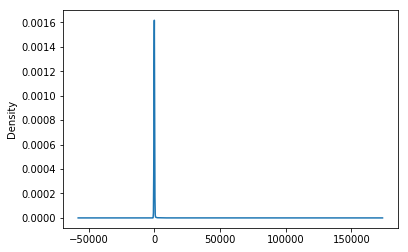

In [7]:
train.price.value_counts().plot(kind='kde')

print(train.price.value_counts())

In [8]:
train.columns

Index(['user_id', 'region', 'city', 'parent_category_name', 'category_name',
       'param_1', 'param_2', 'param_3', 'title', 'description', 'price',
       'item_seq_number', 'activation_date', 'user_type', 'image',
       'image_top_1', 'deal_probability'],
      dtype='object')

In [9]:
train.nunique()

user_id                  771769
region                       28
city                       1733
parent_category_name          9
category_name                47
param_1                     371
param_2                     271
param_3                    1219
title                    788377
description             1317102
price                     17006
item_seq_number           28232
activation_date              21
user_type                     3
image                   1390836
image_top_1                3062
deal_probability          18407
dtype: int64

## Data Engineering

### Pipeline

Fill NaN

In [4]:
def fill_feat(train):
    
    train['price'] = train['price'].fillna(train['price'].median())
    
    return train

Drop

In [5]:
def drop_feat(train):
    train = train.drop(['param_1','param_2','param_3','title','description','image'],axis=1)
    train = train.drop(['user_id','city','image_top_1'],axis=1)

    return train

Dummies

In [6]:
def dum_feat(train):
    features = list(train.drop('price',axis=1).columns)
    dummies = pd.get_dummies(train[features],drop_first=True)
    train = pd.concat([train.drop(features,axis=1),dummies], axis=1)
    return train

Final

In [7]:
def data_engine(train):
    train = fill_feat(train)
    train = drop_feat(train)
    train = dum_feat(train)
    return train

In [14]:
print('Features utilisées (pré-get_dummies):\n')
list(drop_feat(fill_feat(train)).columns)

Features utilisées (pré-get_dummies):



['region',
 'parent_category_name',
 'category_name',
 'price',
 'item_seq_number',
 'activation_date',
 'user_type',
 'deal_probability']

## Machine Learning

### Set up

In [8]:
X = train.drop(['deal_probability'],axis=1)
y = train.deal_probability

X= data_engine(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error

### Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg = linear_reg.fit(X_train,y_train)

In [77]:
print('RMSE train: ', mean_squared_error(y_train,linear_reg.predict(X_train)))
print('RMSE test: ', mean_squared_error(y_test,linear_reg.predict(X_test)))

RMSE train:  0.05848072149001305
RMSE test:  0.0583489660926101


### Lasso

In [78]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
print('RMSE train: ', mean_squared_error(y_train,lasso.predict(X_train)))
print('RMSE test: ', mean_squared_error(y_test,lasso.predict(X_test)))

RMSE train:  0.06759000353253979
RMSE test:  0.06741154945891786


### Ridge

In [80]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)

/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.165327e-22
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
print('RMSE train: ', mean_squared_error(y_train,ridge.predict(X_train)))
print('RMSE test: ', mean_squared_error(y_test,ridge.predict(X_test)))

RMSE train:  0.05848079644395263
RMSE test:  0.05834876431477631


### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfg=RandomForestRegressor()
rfg=rfg.fit(X_train,y_train)

/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
print('RMSE train: ', mean_squared_error(y_train,rfg.predict(X_train)))
print('RMSE test: ', mean_squared_error(y_test,rfg.predict(X_test)))

RMSE train:  0.014018467411170755
RMSE test:  0.06738903134733394


### Ada Boost

In [17]:
from sklearn.ensemble import AdaBoostRegressor

abr=AdaBoostRegressor()
abr=abr.fit(X_train,y_train)

In [20]:
print('RMSE train: ', mean_squared_error(y_train,abr.predict(X_train)))
print('RMSE test: ', mean_squared_error(y_test,abr.predict(X_test)))

RMSE train:  0.06588809357606436
RMSE test:  0.06571948410772852


### XGBoost

In [21]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb=xgb.fit(X_train,y_train)

In [22]:
print('RMSE train: ', mean_squared_error(y_train,xgb.predict(X_train)))
print('RMSE test: ', mean_squared_error(y_test,xgb.predict(X_test)))

RMSE train:  0.057222793600672395
RMSE test:  0.05705907856688481


We can see that the best vanilla algorithm is the **linear/ridge regression**. XGBoost is more efficient but has a limited added value here.

## Hyperparameter Tuning

Working with the ridge regression

### Test with a sample

In [65]:
X_train_sample=X_train[0:int(len(X_train)/5)]
y_train_sample=y_train[0:int(len(y_train)/5)]

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

ridge = Ridge()

ridge_param = {
    'alpha': np.linspace(0,20,50),
    'fit_intercept':[True,False],
    'normalize':[False,True],    
}

ridge_sample_cv = RandomizedSearchCV(ridge, ridge_param, n_jobs=2, cv=5)
ridge_sample_cv = ridge_sample_cv.fit(X_train_sample,y_train_sample)

/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.753165e-18
  overwrite_a=True).T


In [67]:
print('RMSE train: ', mean_squared_error(y_train,ridge_sample_cv.predict(X_train)))
print('RMSE test: ', mean_squared_error(y_test,ridge_sample_cv.predict(X_test)),'\n')
print("Best parameters: ", ridge_sample_cv.best_params_,'\n')

RMSE train:  0.07107559410822528
RMSE test:  0.05836500445319992 

Best parameters:  {'normalize': False, 'fit_intercept': False, 'alpha': 4.4897959183673475} 



### Verification with the full training data

In [82]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=4.4897959183673475)
ridge.fit(X_train,y_train)

/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.231789e-22
  overwrite_a=True).T


Ridge(alpha=4.4897959183673475, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [84]:
print('RMSE train: ', mean_squared_error(y_train,ridge.predict(X_train)))
print('RMSE test: ', mean_squared_error(y_test,ridge.predict(X_test)))

RMSE train:  0.05848117854299687
RMSE test:  0.05834853018096243


### Alpha Selection

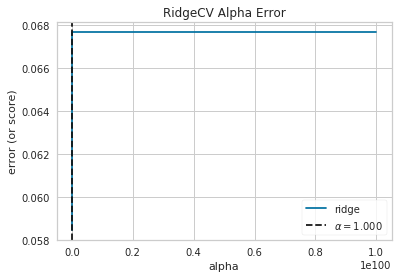

In [94]:
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import RidgeCV

alphas = np.logspace(0, 100, 50)

model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train_sample, y_train_sample)
g = visualizer.poof()

The choice of alpha has no incidence

### Features importance

/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.699906e-19
  overwrite_a=True).T


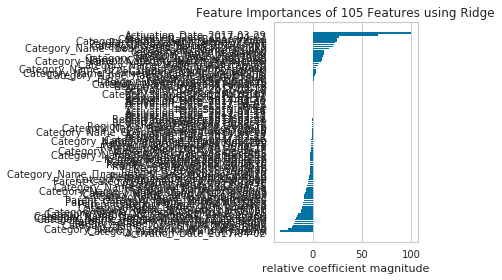

In [102]:
from yellowbrick.features.importances import FeatureImportances

#setup
features = list(X_test.columns)

fig = plt.figure()
ax = fig.add_subplot()

#titles
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(ridge, ax=ax, labels=labels, relative=True)

#fit and show
viz.poof()

In [120]:
feat_coef = pd.DataFrame()
feat_coef['Feature'] = X_train.columns
feat_coef['Coefficient'] = ridge.coef_

feat_coef.sort_values(by='Coefficient')

Feature  Coefficient
52                category_name_Книги и журналы    -0.110251
45        category_name_Грузовики и спецтехника    -0.100468
97                   activation_date_2017-03-30    -0.095955
104                              user_type_Shop    -0.088908
79            category_name_Товары для животных    -0.081612
62        category_name_Недвижимость за рубежом    -0.080354
53             category_name_Коллекционирование    -0.077683
32             parent_category_name_Личные вещи    -0.076667
65      category_name_Одежда, обувь, аксессуары    -0.063925
69      category_name_Посуда и товары для кухни    -0.059902
42               category_name_Водный транспорт    -0.057433
46         category_name_Детская одежда и обувь    -0.051497
49              category_name_Земельные участки    -0.044279
81                    category_name_Фототехника    -0.044165
66        category_name_Оргтехника и расходники    -0.042776
33            parent_category_name_Недвижимость    -0.042057
37                       category_name_Аквариум    -0.039451
82               category_name_Часы и украшения    -0.038229
29             parent_category_name_Для бизнеса    -0.037532
59        category_name_Мотоциклы и мототехника    -0.037005
36           parent_category_name_Хобби и отдых    -0.035517
73                       category_name_Растения    -0.035274
71               category_name_Продукты питания    -0.030408
43           category_name_Гаражи и машиноместа    -0.026510
44                 category_name_Готовый бизнес    -0.025727
68   category_name_Планшеты и электронные книги    -0.020512
24                     region_Тюменская область    -0.018279
30         parent_category_name_Для дома и дачи    -0.015477
80          category_name_Товары для компьютера    -0.014702
21                   region_Ставропольский край    -0.014208
..                                          ...          ...
67                category_name_Охота и рыбалка     0.003748
25                              region_Удмуртия     0.005986
12                 region_Нижегородская область     0.007571
16                         region_Пермский край     0.007922
61          category_name_Настольные компьютеры     0.007947
15                  region_Оренбургская область     0.008395
54      category_name_Коммерческая недвижимость     0.010243
77                       category_name_Телефоны     0.013993
72                          category_name_Птицы     0.016233
50    category_name_Игры, приставки и программы     0.025057
58              category_name_Мебель и интерьер     0.026978
75                         category_name_Собаки     0.033312
103                           user_type_Private     0.033581
48                category_name_Другие животные     0.035746
101                  activation_date_2017-04-03     0.036028
31                parent_category_name_Животные     0.038420
63                       category_name_Ноутбуки     0.043162
60        category_name_Музыкальные инструменты     0.044791
55                        category_name_Комнаты     0.052124
51                       category_name_Квартиры     0.053013
100                  activation_date_2017-04-02     0.053920
56                          category_name_Кошки     0.074192
78     category_name_Товары для детей и игрушки     0.090575
40                category_name_Бытовая техника     0.093612
34               parent_category_name_Транспорт     0.100657
41                     category_name_Велосипеды     0.107877
70              category_name_Предложение услуг     0.107999
35                  parent_category_name_Услуги     0.107999
99                   activation_date_2017-04-01     0.237524
96                   activation_date_2017-03-29     0.489652

[105 rows x 2 columns]

The most important coefficients are:

- Activation date (the older the better)
- Parent category Услуги, Транспорт (services, transportation)
- Category name Предложение услуг > Велосипеды > Бытовая техника > Товары для детей и игрушки > Кошки (Services offer> Bicycles> Household appliances> Goods for children and toys> Cats)
- Region has no importance, hence cities have good chances to not influence the results either

## What's next?

1. Fill Na of params_ features and test its inclusion in the model
2. NLP on cities, description, title to group the dataset
3. Optimize the calculations to include user_id in the model
4. NN on the pictures to extract a new features 'pic_quality'
5. Concat dataset train & test before applying data_engine()

- Lancer tuning sur data moins important
- Checkpoint: toutes les x iterations, mettre les resultats de tes parametres et y associer son accuracy.
- Pickle (python): sauvegarder une variable dans un fichier, versioning, etc
    import cpickle
    cpickle.dump # dumper et loader